# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import PyPDF2
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path_csv = './sinasc_RO_2019.csv'
df = pd.read_csv(file_path_csv)
print(df.head())

file_path_pdf = './Estrutura_SINASC_para_CD.pdf'

with open(file_path_pdf, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    num_pages = len(pdf_reader.pages)
    for page in range(num_pages):
        page_obj = pdf_reader.pages[page]
        text = page_obj.extract_text()
        print(text)
  



   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
def categorize_apgar5(score):
    if score >= 0 and score <= 3:
        return 'asfixia grave'
    elif score >= 4 and score <= 5:
        return 'asfixia moderada'
    elif score >= 6 and score <= 7:
        return 'asfixia leve'
    elif score >= 8 and score <= 10:
        return 'normal'
    else:
        return 'inválido'  # for any unexpected values

df['APGAR5_category'] = df['APGAR5'].apply(categorize_apgar5)

print(df[['APGAR5', 'APGAR5_category']].head())


   APGAR5 APGAR5_category
0    10.0          normal
1     9.0          normal
2    10.0          normal
3    10.0          normal
4    10.0          normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

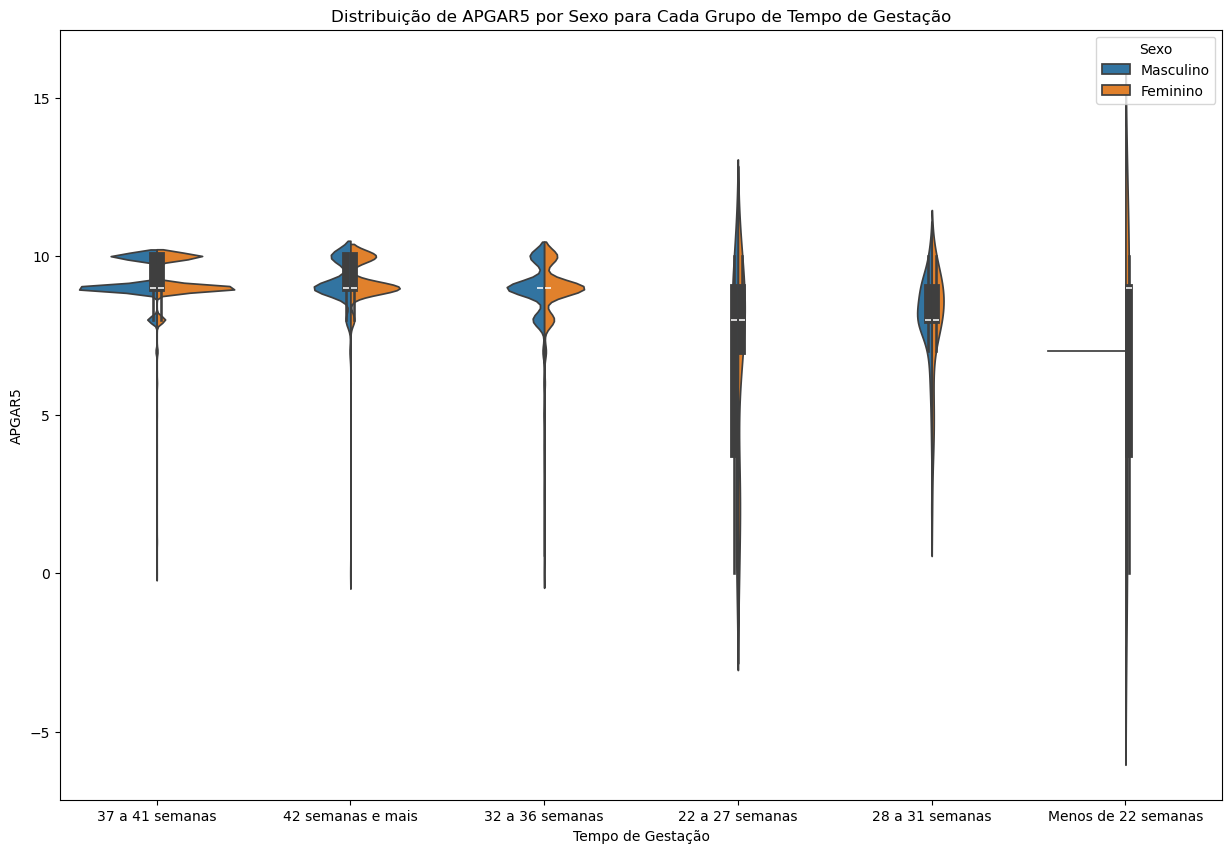

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma função para categorizar a variável APGAR5
def categorize_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return 'valor inválido'

# Aplicar a função à coluna APGAR5
df['APGAR5_categoria'] = df['APGAR5'].apply(categorize_apgar5)

# Plotar a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação
plt.figure(figsize=(15, 10))
sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, split=True)
plt.title('Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo')
plt.show()




####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [8]:
# Definir uma função para categorizar a variável APGAR5
def categorize_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return 'valor inválido'

# Aplicar a função à coluna APGAR5
df['APGAR5_categoria'] = df['APGAR5'].apply(categorize_apgar5)

# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_categoria'])

# Exibir a tabela cruzada
print(tabela_cruzada)


APGAR5_categoria     asfixia grave  asfixia leve  asfixia moderada  normal  \
GESTACAO                                                                     
22 a 27 semanas                 21            12                 1      51   
28 a 31 semanas                  3            18                12     129   
32 a 36 semanas                  8            73                19    2134   
37 a 41 semanas                 33           196                28   22266   
42 semanas e mais                1             6                 1     690   
Menos de 22 semanas              2             1                 0       4   

APGAR5_categoria     valor inválido  
GESTACAO                             
22 a 27 semanas                   1  
28 a 31 semanas                   3  
32 a 36 semanas                  15  
37 a 41 semanas                  66  
42 semanas e mais                 2  
Menos de 22 semanas               0  


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [10]:
# Definir uma função para categorizar a variável APGAR5
def categorize_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return 'valor inválido'

# Aplicar a função à coluna APGAR5
df['APGAR5_categoria'] = df['APGAR5'].apply(categorize_apgar5)

# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_categoria'])

# Calcular os percentuais de linha
percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Exibir a tabela de percentuais
print(percentual_linha)


APGAR5_categoria     asfixia grave  asfixia leve  asfixia moderada     normal  \
GESTACAO                                                                        
22 a 27 semanas          24.418605     13.953488          1.162791  59.302326   
28 a 31 semanas           1.818182     10.909091          7.272727  78.181818   
32 a 36 semanas           0.355714      3.245887          0.844820  94.886616   
37 a 41 semanas           0.146089      0.867679          0.123954  98.570100   
42 semanas e mais         0.142857      0.857143          0.142857  98.571429   
Menos de 22 semanas      28.571429     14.285714          0.000000  57.142857   

APGAR5_categoria     valor inválido  
GESTACAO                             
22 a 27 semanas            1.162791  
28 a 31 semanas            1.818182  
32 a 36 semanas            0.666963  
37 a 41 semanas            0.292178  
42 semanas e mais          0.285714  
Menos de 22 semanas        0.000000  


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

APGAR5_categoria  asfixia grave  asfixia leve  asfixia moderada     normal  \
GESTACAO_class                                                               
prematuro              1.280000      4.120000          1.280000  92.560000   
termo                  0.171233      0.884703          0.146771  98.454827   

APGAR5_categoria  valor inválido  
GESTACAO_class                    
prematuro               0.760000  
termo                   0.342466  


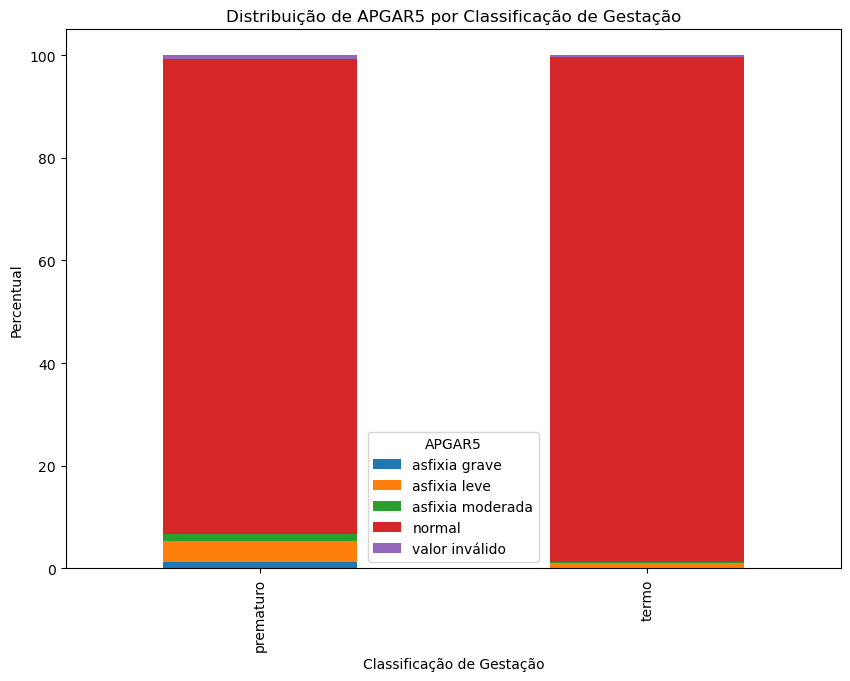

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma função para categorizar a variável APGAR5
def categorize_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return 'valor inválido'

# Aplicar a função à coluna APGAR5
df['APGAR5_categoria'] = df['APGAR5'].apply(categorize_apgar5)

# Adicionar coluna de classificação de gestação
df['GESTACAO_class'] = df['GESTACAO'].apply(lambda x: 'prematuro' if x in ['22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas'] else 'termo')

# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(df['GESTACAO_class'], df['APGAR5_categoria'])

# Calcular os percentuais de linha
percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Exibir a tabela de percentuais
print(percentual_linha)

# Plotar o gráfico de barras
percentual_linha.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribuição de APGAR5 por Classificação de Gestação')
plt.xlabel('Classificação de Gestação')
plt.ylabel('Percentual')
plt.legend(title='APGAR5')
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

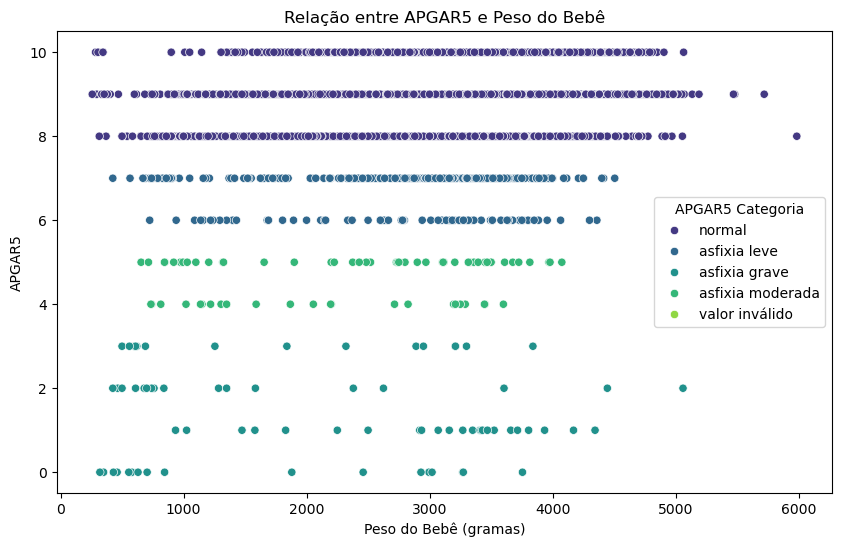

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma função para categorizar a variável APGAR5
def categorize_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return 'valor inválido'

# Aplicar a função à coluna APGAR5
df['APGAR5_categoria'] = df['APGAR5'].apply(categorize_apgar5)

# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PESO', y='APGAR5', hue='APGAR5_categoria', data=df, palette='viridis')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Peso do Bebê (gramas)')
plt.ylabel('APGAR5')
plt.legend(title='APGAR5 Categoria')
plt.show()


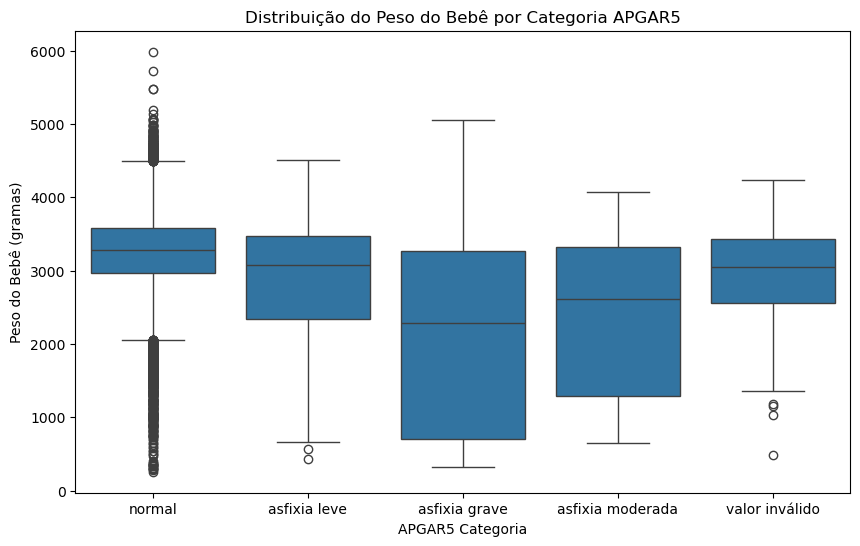

In [15]:
# Gráfico de Boxplot sem paleta específica
plt.figure(figsize=(10, 6))
sns.boxplot(x='APGAR5_categoria', y='PESO', data=df)
plt.title('Distribuição do Peso do Bebê por Categoria APGAR5')
plt.xlabel('APGAR5 Categoria')
plt.ylabel('Peso do Bebê (gramas)')
plt.show()

